## 5. Gets and Multi-gets (90 pts)

In [10]:
%load_ext autoreload
%autoreload 2

from queries import query_mw as q_mw
from queries import query_client as q_client
from queries import query_rthist_mw as q_rthist_mw
from queries import query_rthist_client as q_rthist_client
from queries import weighted_stats
from queries import hist_stats


from plots.ctrl import generate, dashboard_nc, dashboard_mget, dashboard_time
from plots import tp, rt

suite={
    "exp51":"simulation_p2",
    "exp52":"simulation_p2"
}

throughput_max_n_worker = 32

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 5.1 Sharded-Case

n_w=8   op_type=get  num_clients=12   mget_size=1


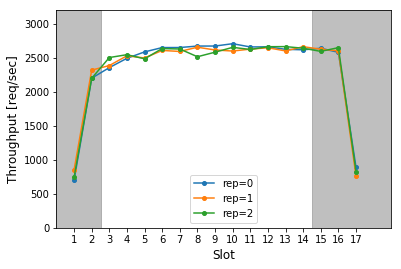

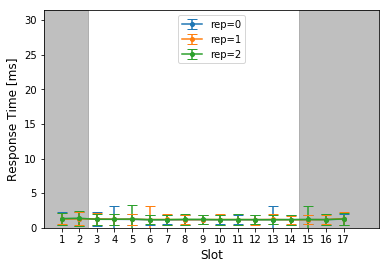

n_w=8   op_type=mget  num_clients=12   mget_size=3


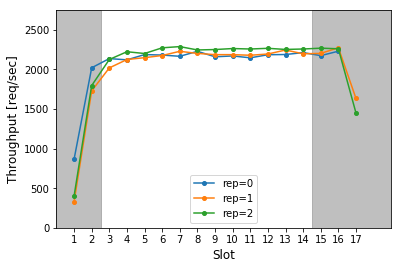

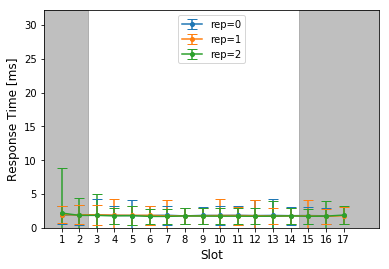

n_w=8   op_type=mget  num_clients=12   mget_size=6


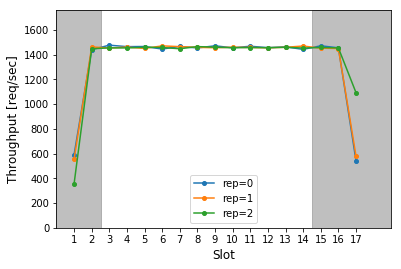

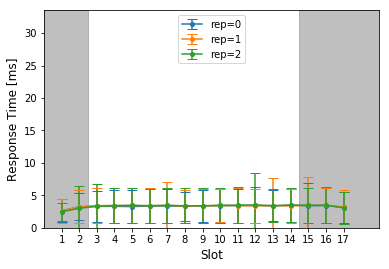

n_w=8   op_type=mget  num_clients=12   mget_size=9


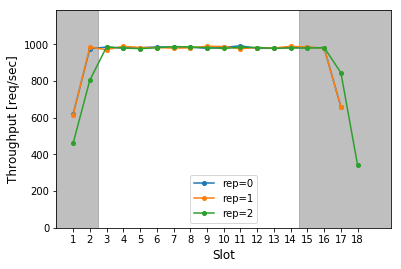

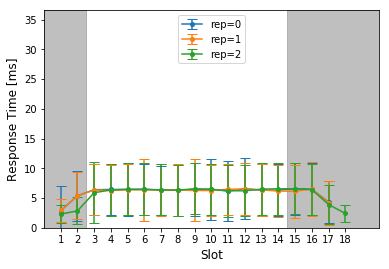

n_w=8   op_type=set  num_clients=12   mget_size=1


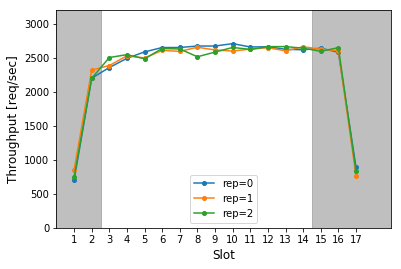

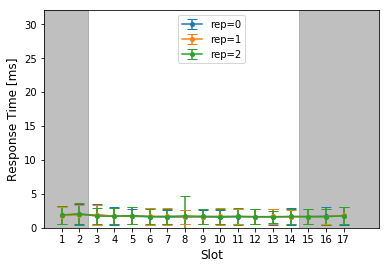

n_w=8   op_type=set  num_clients=12   mget_size=3


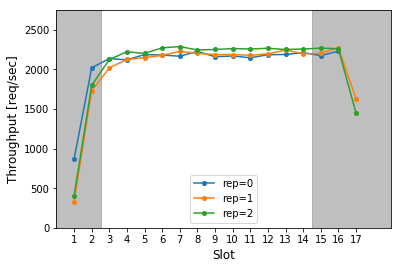

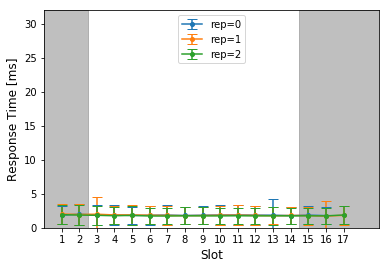

n_w=8   op_type=set  num_clients=12   mget_size=6


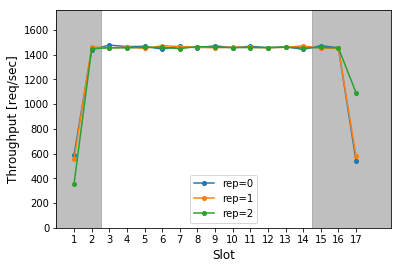

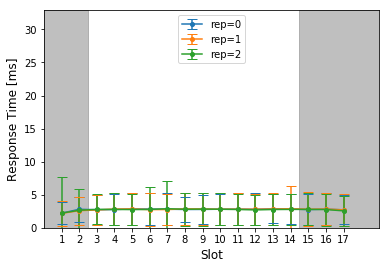

n_w=8   op_type=set  num_clients=12   mget_size=9


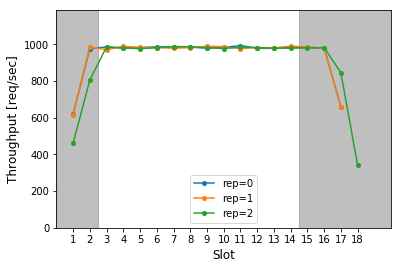

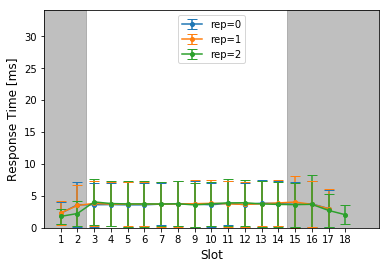

n_w=16   op_type=get  num_clients=12   mget_size=1


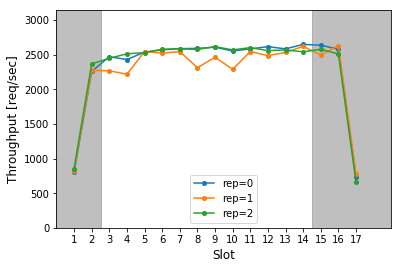

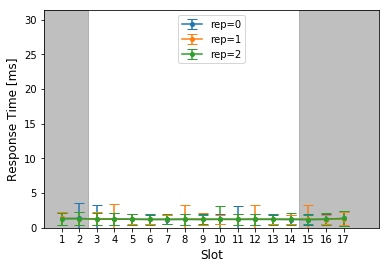

n_w=16   op_type=mget  num_clients=12   mget_size=3


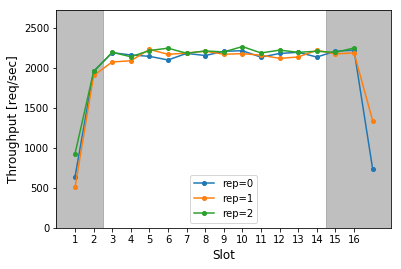

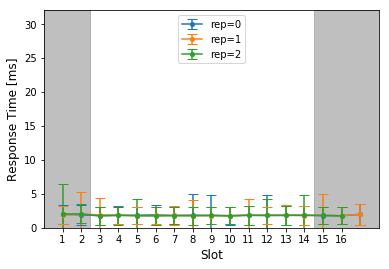

n_w=16   op_type=mget  num_clients=12   mget_size=6


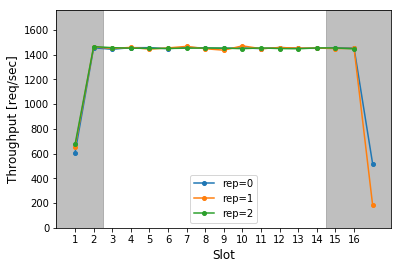

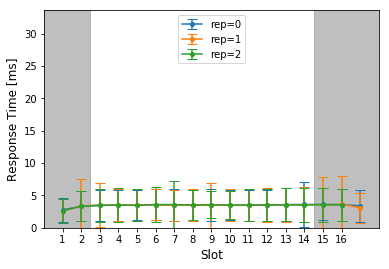

n_w=16   op_type=mget  num_clients=12   mget_size=9


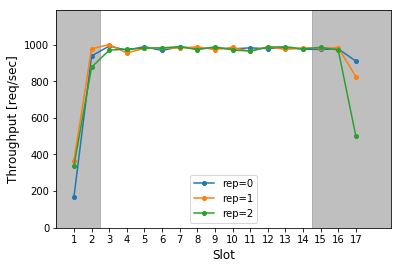

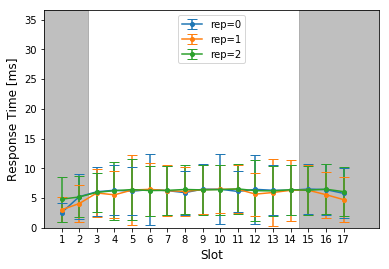

n_w=16   op_type=set  num_clients=12   mget_size=1


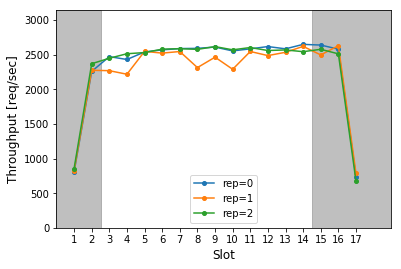

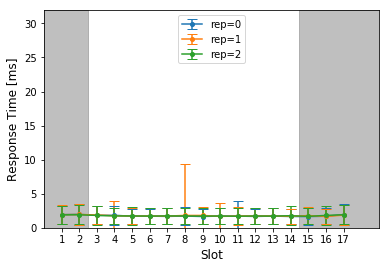

n_w=16   op_type=set  num_clients=12   mget_size=3


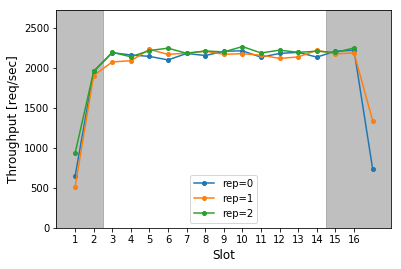

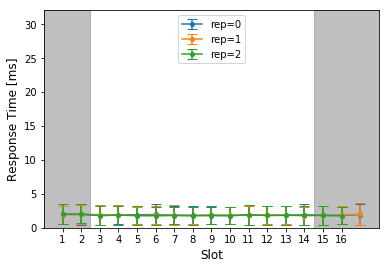

n_w=16   op_type=set  num_clients=12   mget_size=6


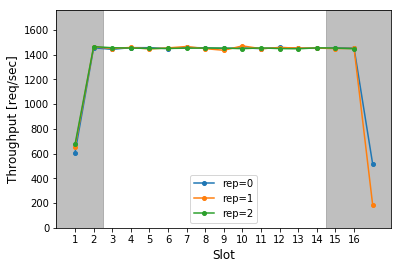

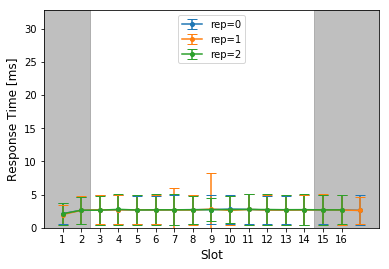

n_w=16   op_type=set  num_clients=12   mget_size=9


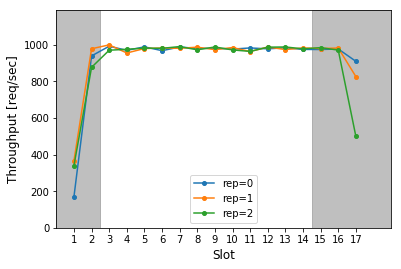

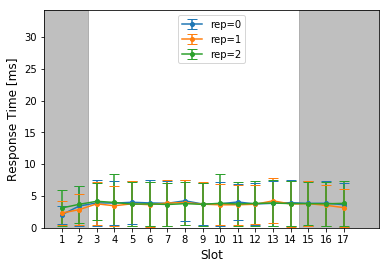

n_w=32   op_type=get  num_clients=12   mget_size=1


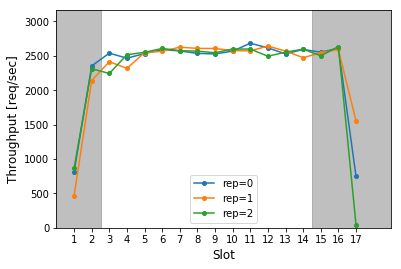

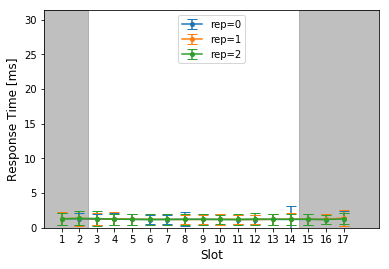

n_w=32   op_type=mget  num_clients=12   mget_size=3


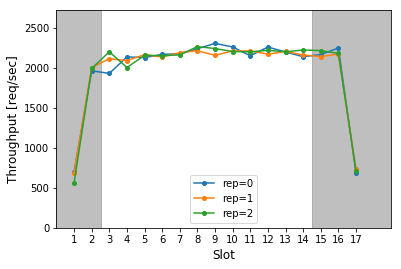

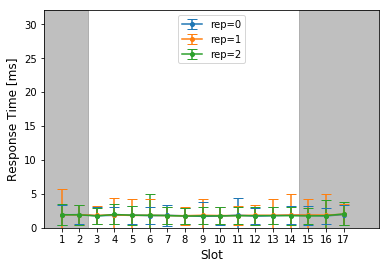

n_w=32   op_type=mget  num_clients=12   mget_size=6


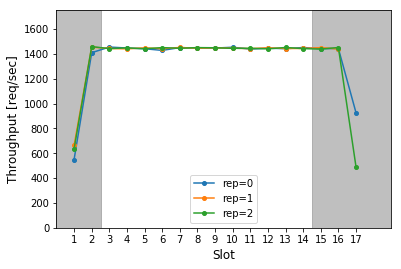

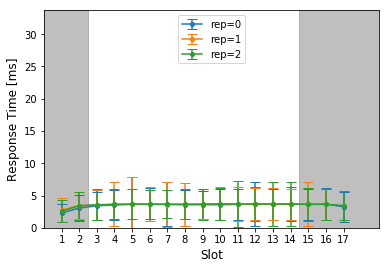

n_w=32   op_type=mget  num_clients=12   mget_size=9


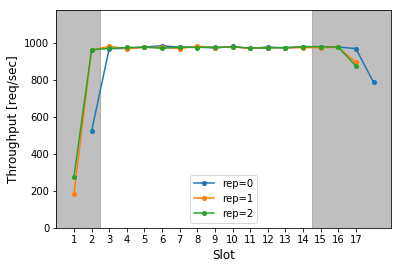

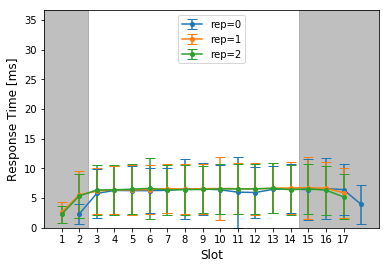

n_w=32   op_type=set  num_clients=12   mget_size=1


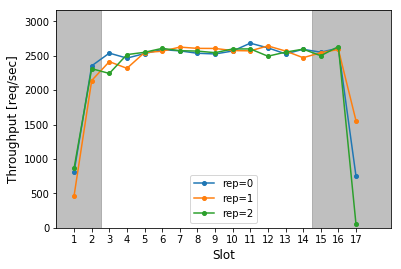

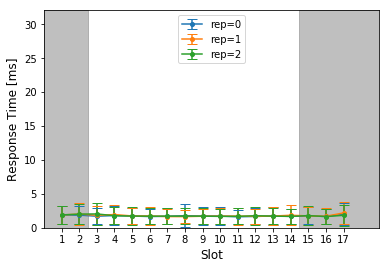

n_w=32   op_type=set  num_clients=12   mget_size=3


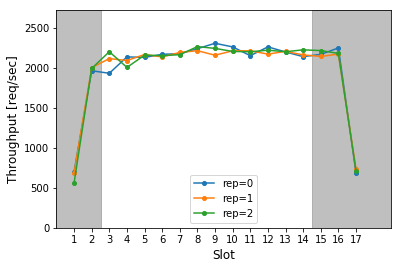

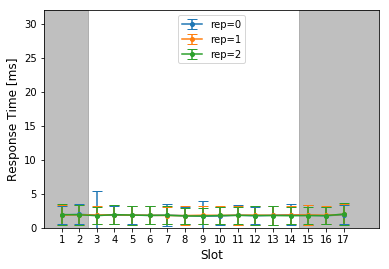

n_w=32   op_type=set  num_clients=12   mget_size=6


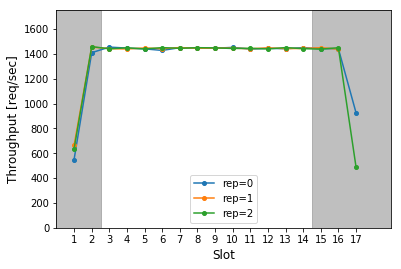

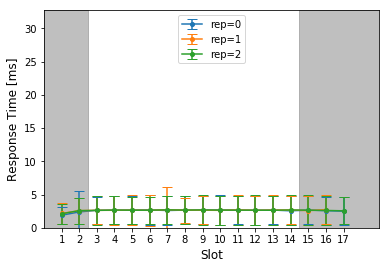

n_w=32   op_type=set  num_clients=12   mget_size=9


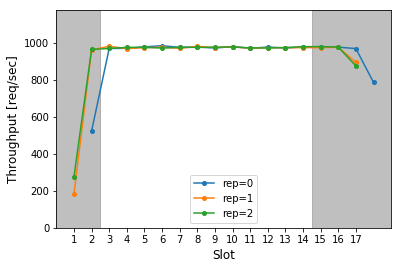

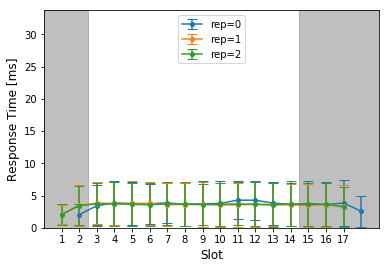

n_w=64   op_type=get  num_clients=12   mget_size=1


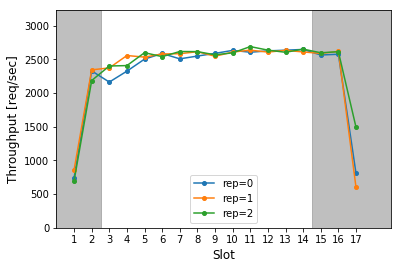

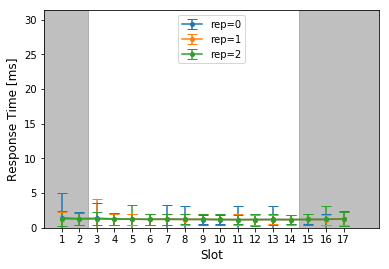

n_w=64   op_type=mget  num_clients=12   mget_size=3


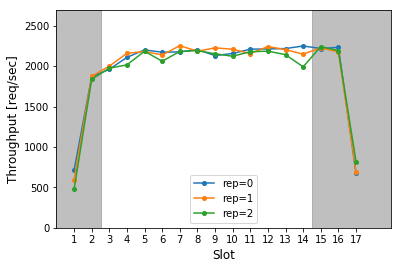

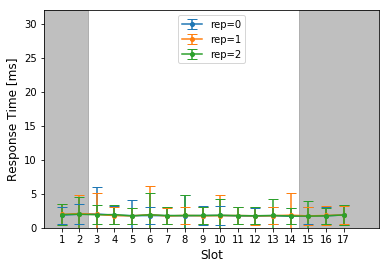

n_w=64   op_type=mget  num_clients=12   mget_size=6


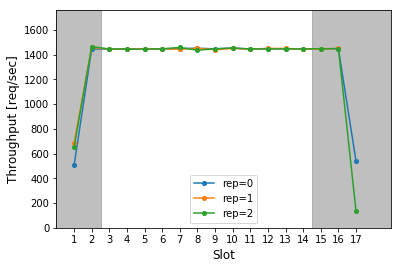

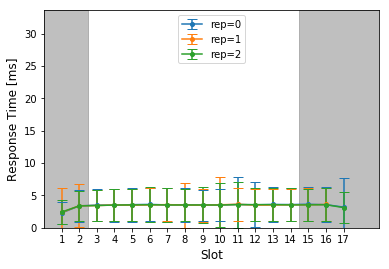

n_w=64   op_type=mget  num_clients=12   mget_size=9


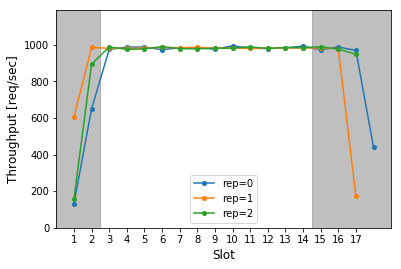

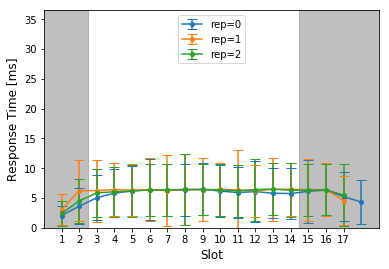

n_w=64   op_type=set  num_clients=12   mget_size=1


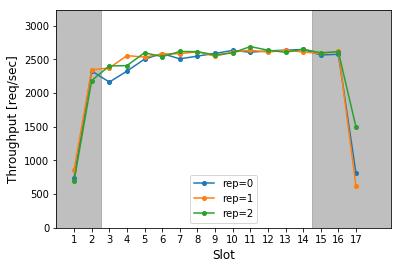

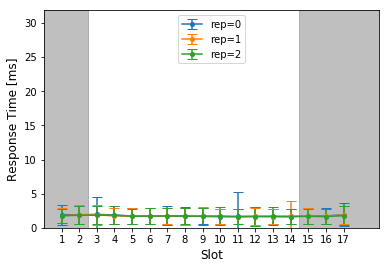

n_w=64   op_type=set  num_clients=12   mget_size=3


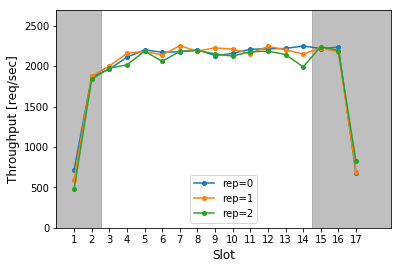

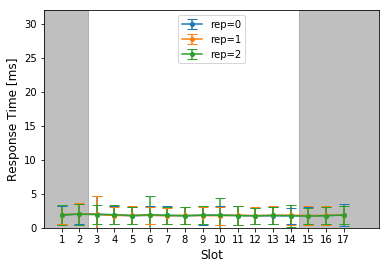

n_w=64   op_type=set  num_clients=12   mget_size=6


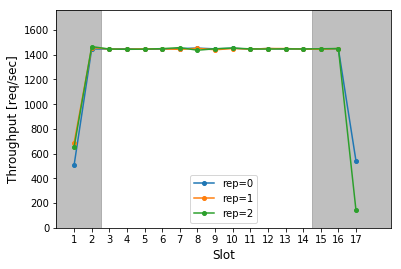

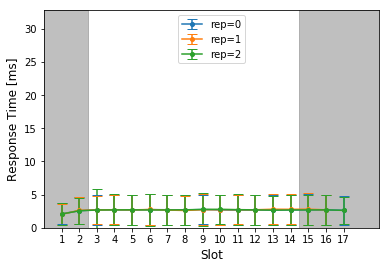

n_w=64   op_type=set  num_clients=12   mget_size=9


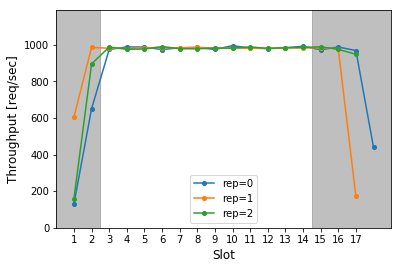

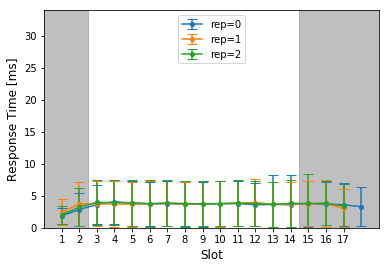

In [15]:
exp_name="exp51"
dashboard_time(suite=suite[exp_name], exp_name=exp_name)

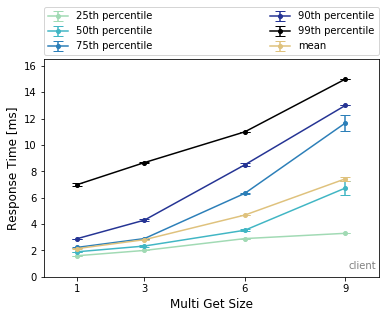

In [7]:
exp_name="exp51"
_,df_exp51_client_qtm = q_rthist_client.load_df(suite=suite[exp_name], exp=exp_name)
df_exp51_client_qtm = df_exp51_client_qtm[df_exp51_client_qtm['n_worker_per_mw']==throughput_max_n_worker]
df_exp51_client_qtm = df_exp51_client_qtm[df_exp51_client_qtm['op_type']=='get']

generate(rt.mget_perc, df_exp51_client_qtm, suite[exp_name], f"{exp_name}_sharded_rt_mget_perc_client")

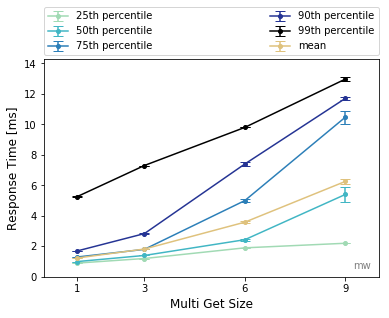

In [8]:
exp_name="exp51"
_, df_exp51_mw_qtm = q_rthist_mw.load_df(suite=suite[exp_name], exp=exp_name)
df_exp51_mw_qtm = df_exp51_mw_qtm[df_exp51_mw_qtm['n_worker_per_mw']==throughput_max_n_worker]
df_exp51_mw_qtm = df_exp51_mw_qtm[df_exp51_mw_qtm['op_type']=='get']

generate(rt.mget_perc, df_exp51_mw_qtm ) 

#### 5.1.1 Explanation

FOR INTERACTIVE LAW USES SET RESPONSE TIME AS CLIENT THINKING TIME
Client: 0 repetitions don't have throughput
Client: 


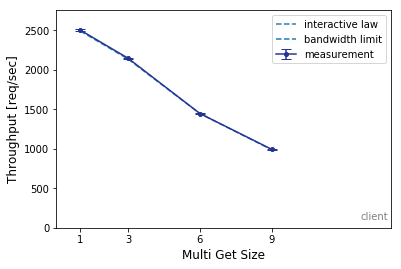

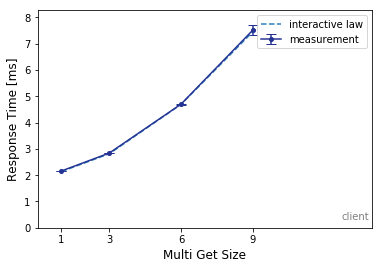

MW: 


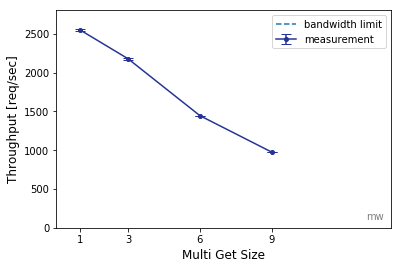

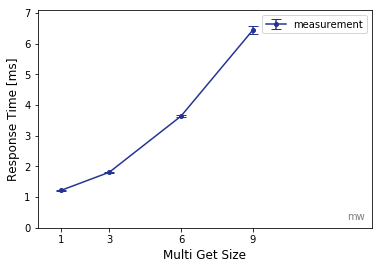

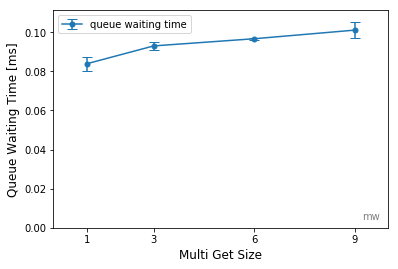

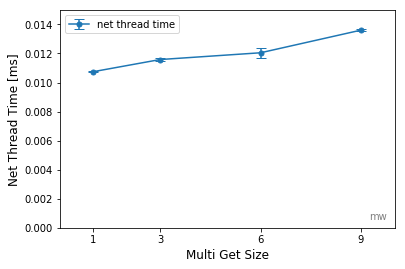

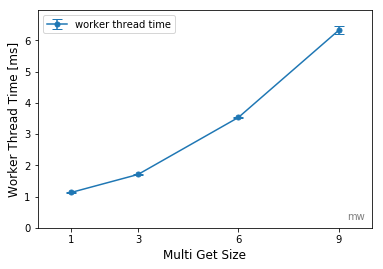

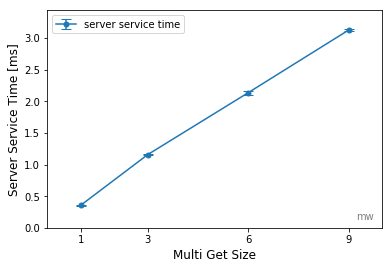

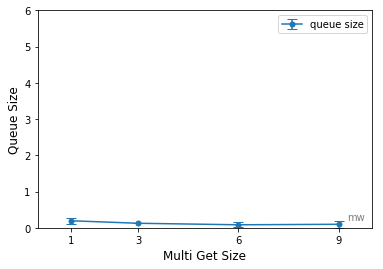

In [9]:
exp_name="exp51"

print("FOR INTERACTIVE LAW USES SET RESPONSE TIME AS CLIENT THINKING TIME")

df_exp51_mw = q_mw.load_df(suite=suite[exp_name], exp=exp_name)
df_exp51_mw.loc[df_exp51_mw.op_type == 'get' , "op_type"] = "mget"
df_exp51_mw['client_thinktime'] = df_exp51_mw.apply(lambda row: df_exp51_mw[(df_exp51_mw['multi_get_size']==row['multi_get_size'])&(df_exp51_mw['op_type']=='set')].loc[:,'rt_rep_mean'].values[0], axis=1)
df_exp51_mw = df_exp51_mw[df_exp51_mw['op_type']=='mget']
df_exp51_mw = df_exp51_mw[df_exp51_mw['n_worker_per_mw']==throughput_max_n_worker]


df_exp51_client = q_client.load_df(suite=suite[exp_name], exp=exp_name)
df_exp51_client = df_exp51_client[df_exp51_client['n_worker_per_mw']==throughput_max_n_worker]
df_exp51_client['throughput_rep_mean'] = df_exp51_client['throughputget_rep_mean']
df_exp51_client['throughput_rep_std'] = df_exp51_client['throughputget_rep_std']
df_exp51_client['rt_rep_mean'] = df_exp51_client['rtget_rep_mean']
df_exp51_client['rt_rep_std'] = df_exp51_client['rtget_rep_std']
df_exp51_client['client_thinktime'] = df_exp51_client['rtset_rep_mean']
df_exp51_client['op_type'] = "get"

print("Client: ")
generate(tp.mget, df_exp51_client)
generate(rt.mget, df_exp51_client)

print("MW: ")

dashboard_mget(df_exp51_mw)

### 5.2 Non-Sharded Case

n_w=8   op_type=get  num_clients=12   mget_size=1


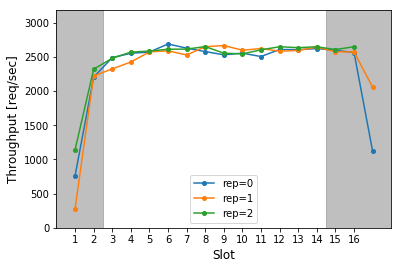

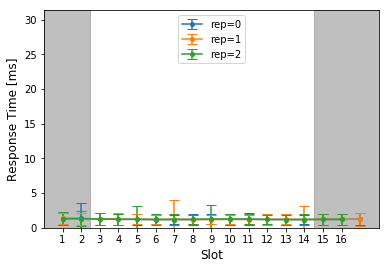

n_w=8   op_type=mget  num_clients=12   mget_size=3


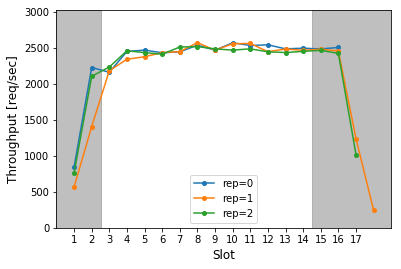

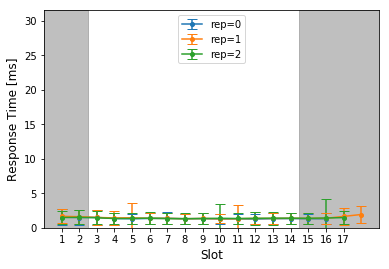

n_w=8   op_type=mget  num_clients=12   mget_size=6


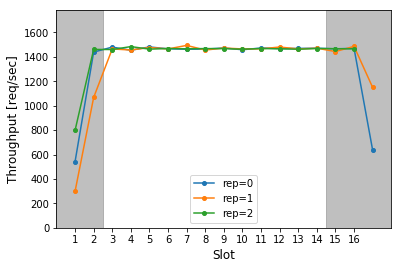

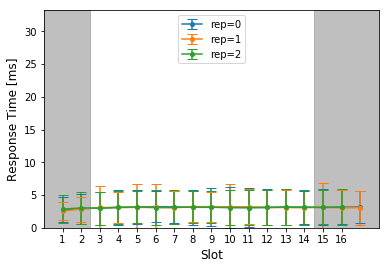

n_w=8   op_type=mget  num_clients=12   mget_size=9


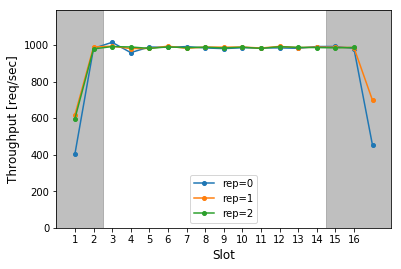

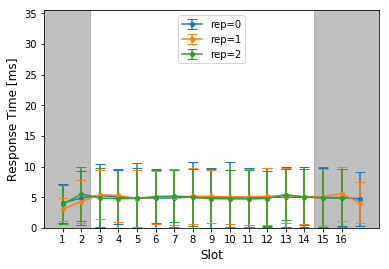

n_w=8   op_type=set  num_clients=12   mget_size=1


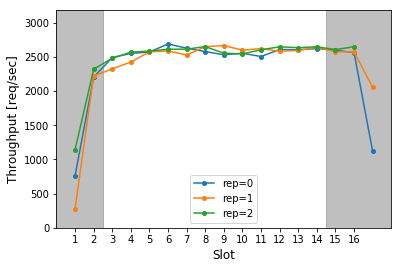

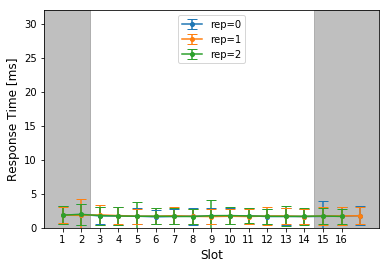

n_w=8   op_type=set  num_clients=12   mget_size=3


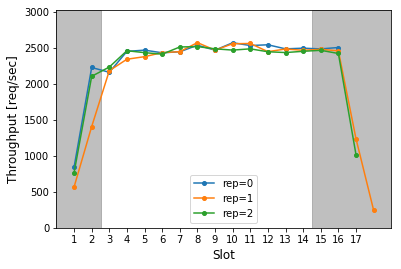

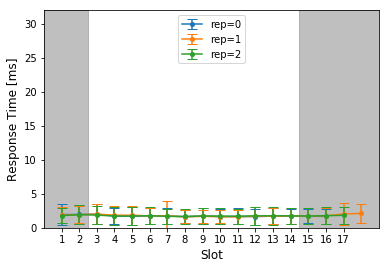

n_w=8   op_type=set  num_clients=12   mget_size=6


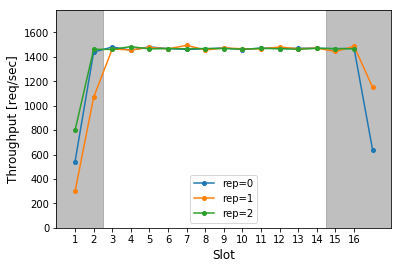

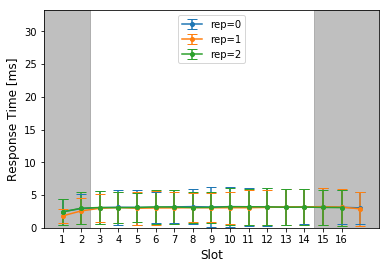

n_w=8   op_type=set  num_clients=12   mget_size=9


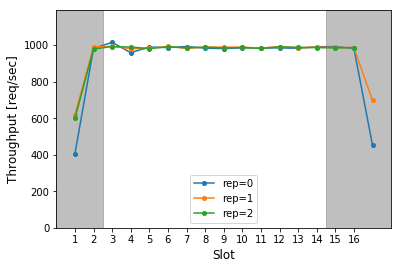

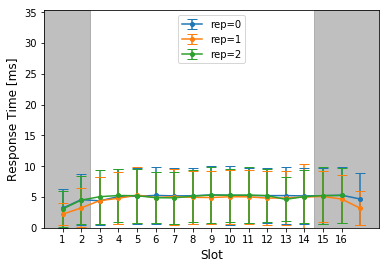

n_w=16   op_type=get  num_clients=12   mget_size=1


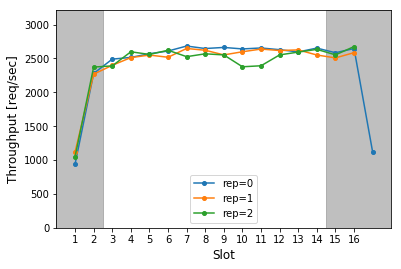

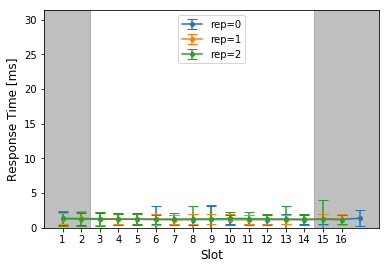

n_w=16   op_type=mget  num_clients=12   mget_size=3


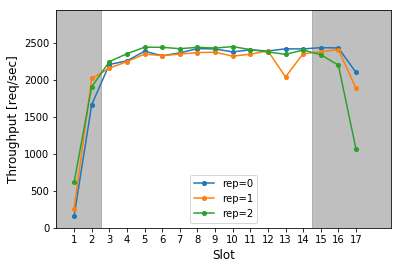

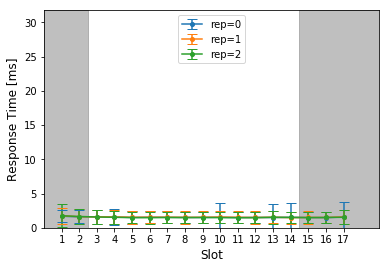

n_w=16   op_type=mget  num_clients=12   mget_size=6


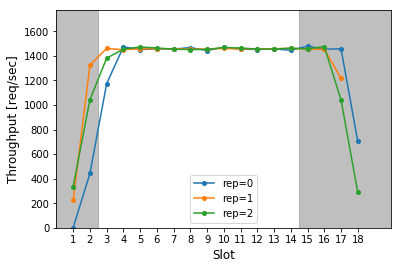

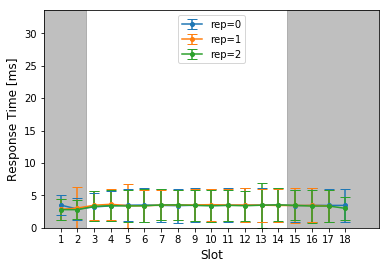

n_w=16   op_type=mget  num_clients=12   mget_size=9


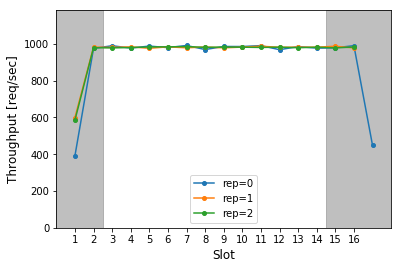

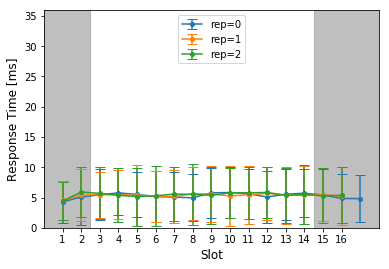

n_w=16   op_type=set  num_clients=12   mget_size=1


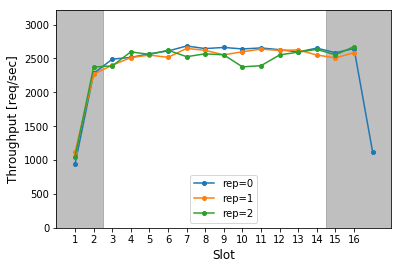

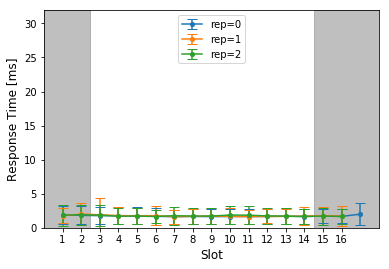

n_w=16   op_type=set  num_clients=12   mget_size=3


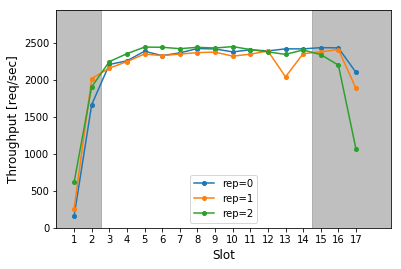

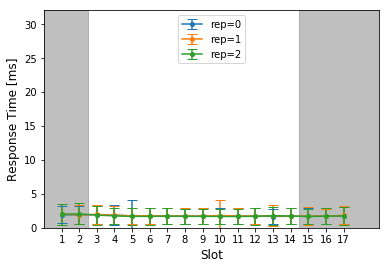

n_w=16   op_type=set  num_clients=12   mget_size=6


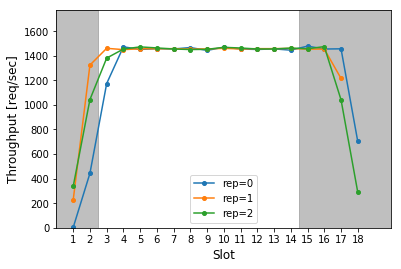

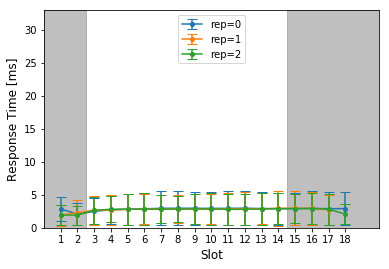

n_w=16   op_type=set  num_clients=12   mget_size=9


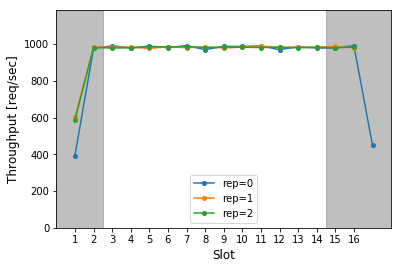

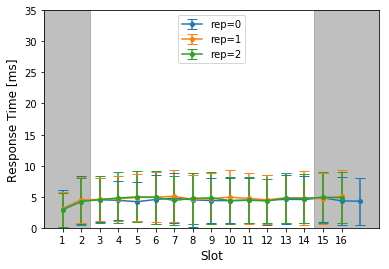

n_w=32   op_type=get  num_clients=12   mget_size=1


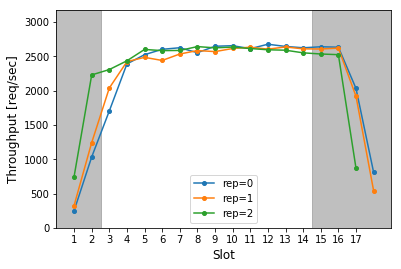

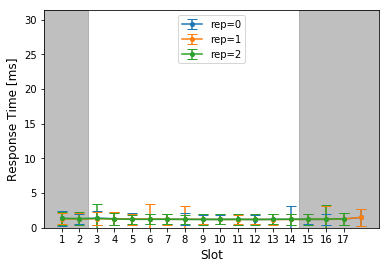

n_w=32   op_type=mget  num_clients=12   mget_size=3


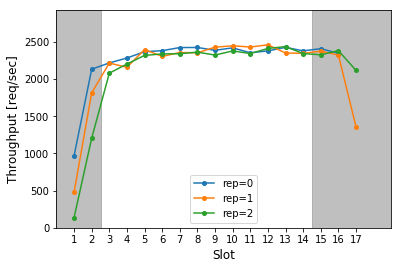

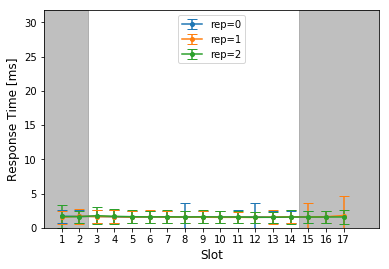

n_w=32   op_type=mget  num_clients=12   mget_size=6


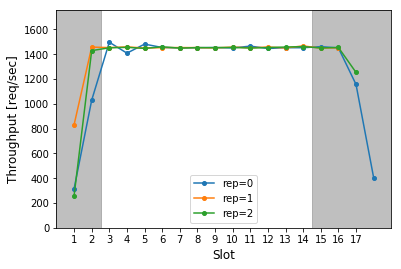

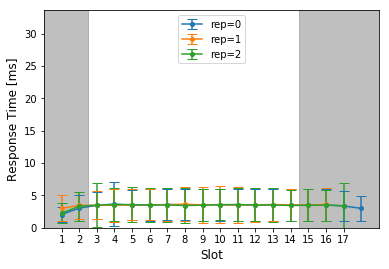

n_w=32   op_type=mget  num_clients=12   mget_size=9


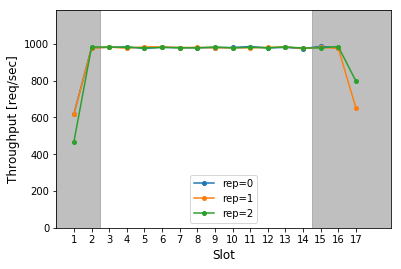

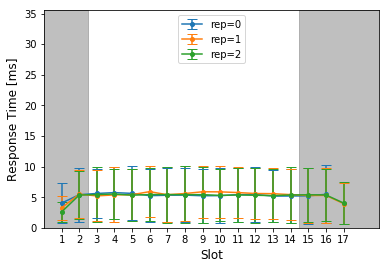

n_w=32   op_type=set  num_clients=12   mget_size=1


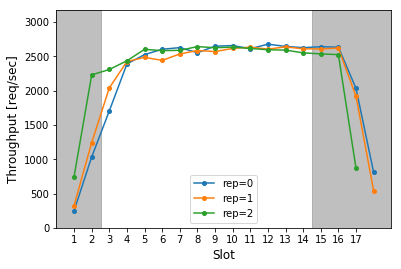

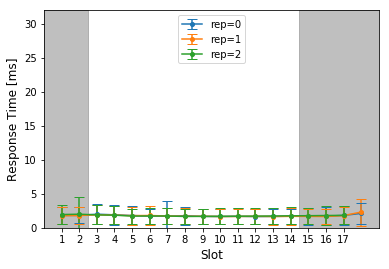

n_w=32   op_type=set  num_clients=12   mget_size=3


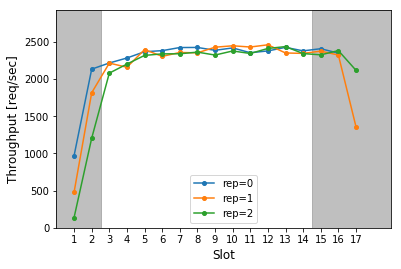

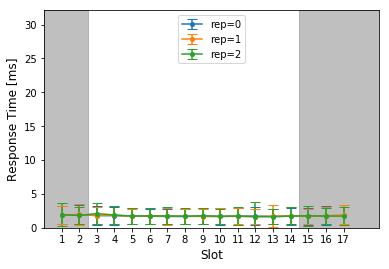

n_w=32   op_type=set  num_clients=12   mget_size=6


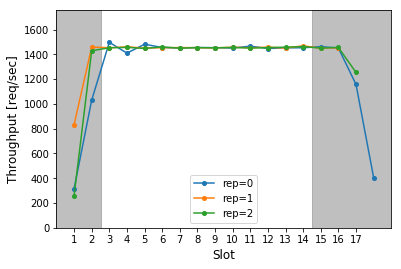

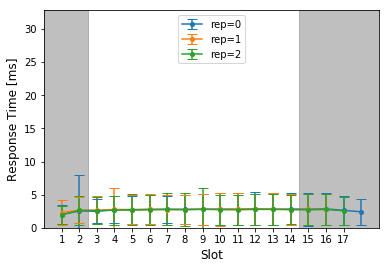

n_w=32   op_type=set  num_clients=12   mget_size=9


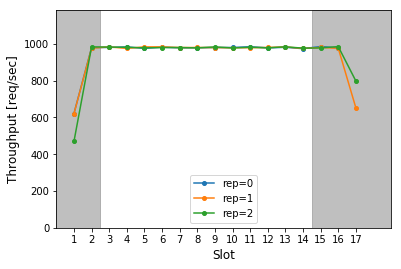

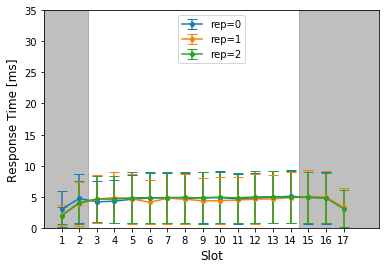

n_w=64   op_type=get  num_clients=12   mget_size=1


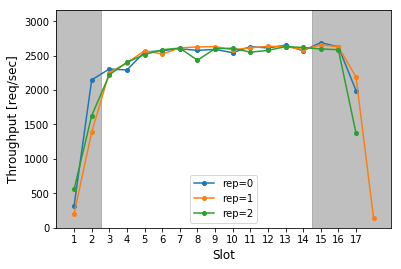

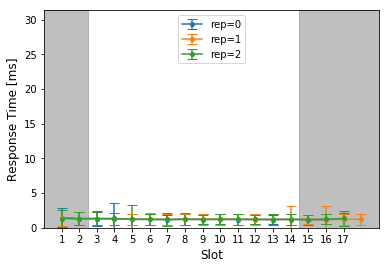

n_w=64   op_type=mget  num_clients=12   mget_size=3


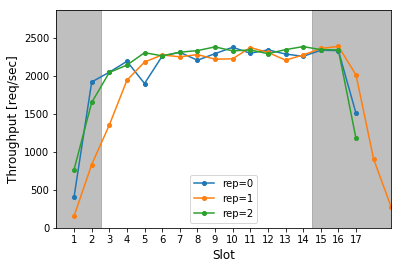

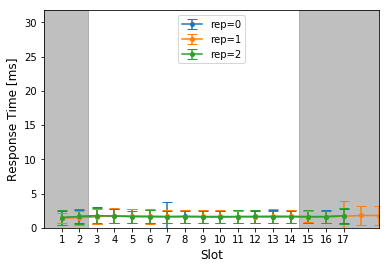

n_w=64   op_type=mget  num_clients=12   mget_size=6


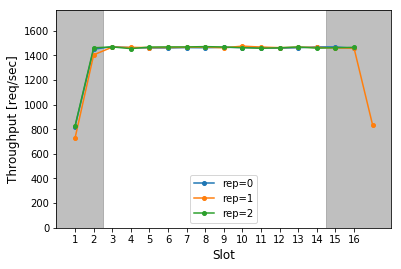

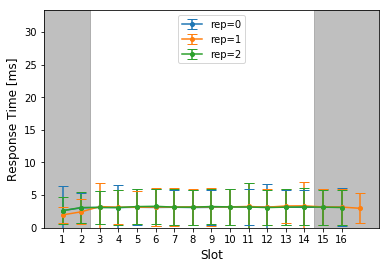

n_w=64   op_type=mget  num_clients=12   mget_size=9


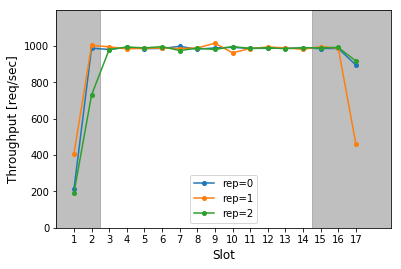

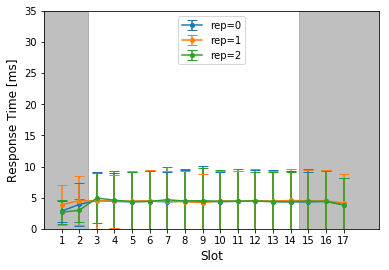

n_w=64   op_type=set  num_clients=12   mget_size=1


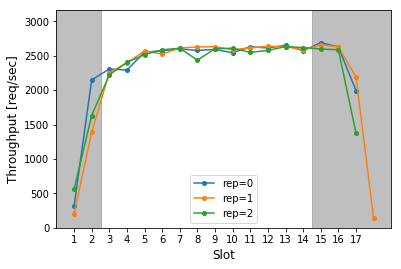

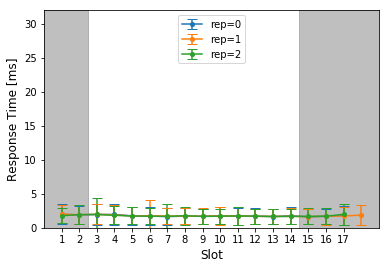

n_w=64   op_type=set  num_clients=12   mget_size=3


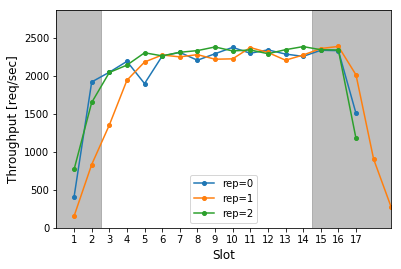

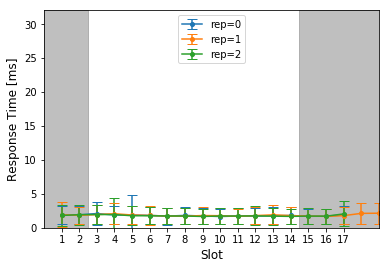

n_w=64   op_type=set  num_clients=12   mget_size=6


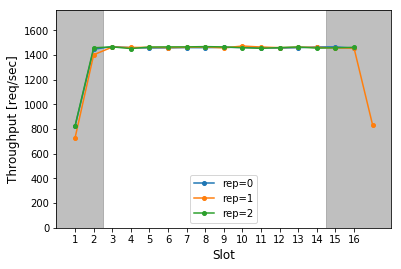

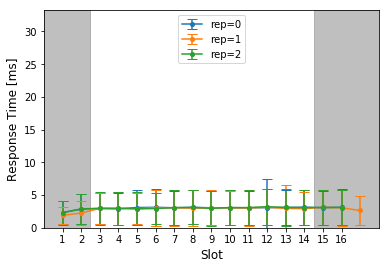

n_w=64   op_type=set  num_clients=12   mget_size=9


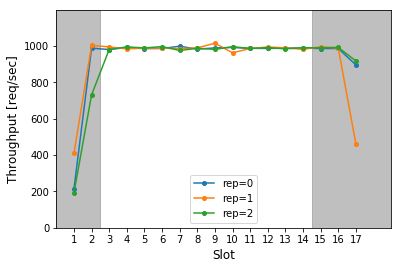

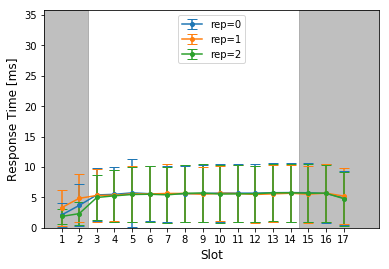

In [11]:
exp_name="exp52"
dashboard_time(suite=suite[exp_name], exp_name=exp_name)

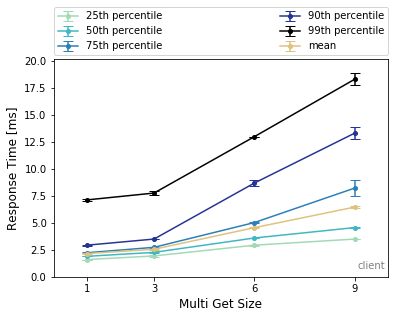

In [12]:
exp_name="exp52"
_,df_exp52_client_qtm = q_rthist_client.load_df(suite=suite[exp_name], exp=exp_name)
df_exp52_client_qtm = df_exp52_client_qtm[df_exp52_client_qtm['op_type']=='get']
df_exp52_client_qtm = df_exp52_client_qtm[df_exp52_client_qtm['n_worker_per_mw']==throughput_max_n_worker]

generate(rt.mget_perc, df_exp52_client_qtm, suite[exp_name], f"{exp_name}_nonsharded_rt_mget_perc_client")

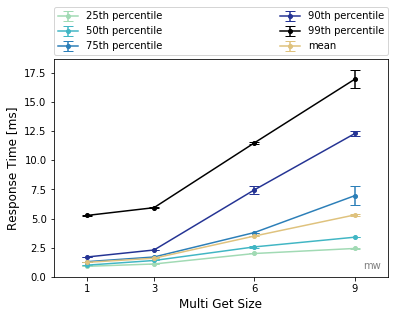

In [13]:
exp_name="exp52"
_, df_exp52_mw_qtm = q_rthist_mw.load_df(suite=suite[exp_name], exp=exp_name)
df_exp52_mw_qtm = df_exp52_mw_qtm[df_exp52_mw_qtm['op_type']=='get']
df_exp52_mw_qtm = df_exp52_mw_qtm[df_exp52_mw_qtm['n_worker_per_mw']==throughput_max_n_worker]

generate(rt.mget_perc, df_exp52_mw_qtm) 

#### 5.2.1 Explanation

FOR INTERACTIVE LAW USES SET RESPONSE TIME AS CLIENT THINKING TIME
Client: 


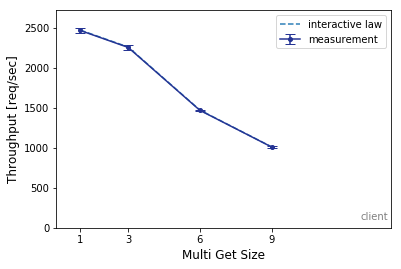

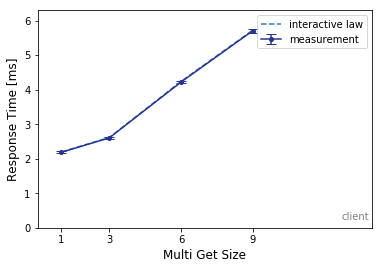

MW: 


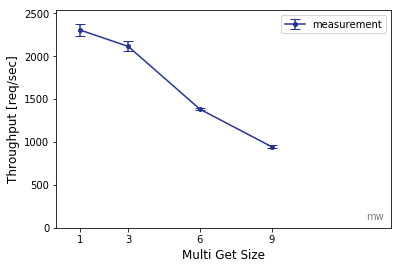

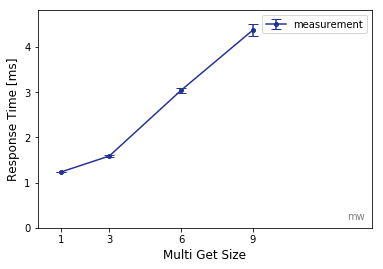

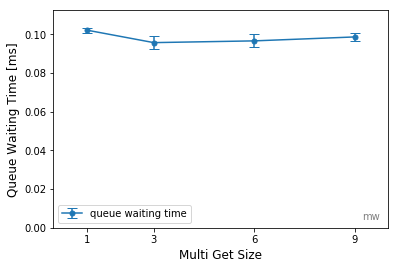

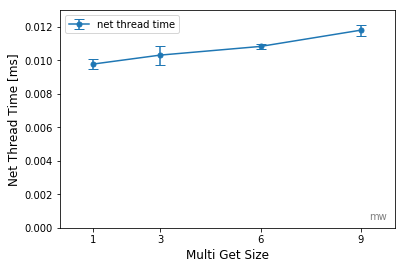

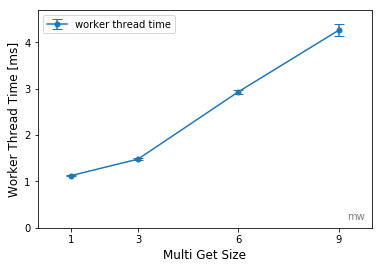

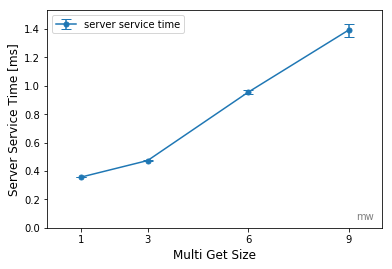

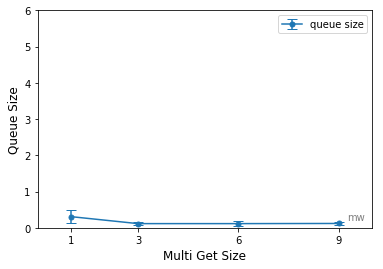

In [49]:
exp_name="exp52"

print("FOR INTERACTIVE LAW USES SET RESPONSE TIME AS CLIENT THINKING TIME")

df_exp52_mw = q_mw.load_df(suite=suite[exp_name], exp=exp_name)
df_exp52_mw.loc[df_exp52_mw.op_type == 'get' , "op_type"] = "mget"
df_exp52_mw['client_thinktime'] = df_exp52_mw.apply(lambda row: df_exp52_mw[(df_exp52_mw['multi_get_size']==row['multi_get_size'])&(df_exp52_mw['op_type']=='set')].loc[:,'rt_rep_mean'].values[0], axis=1)
df_exp52_mw = df_exp52_mw[df_exp52_mw['op_type']=='mget']
df_exp52_mw = df_exp52_mw[df_exp52_mw['n_worker_per_mw']==throughput_max_n_worker]

df_exp52_client = q_client.load_df(suite=suite[exp_name], exp=exp_name)
df_exp52_client = df_exp52_client[df_exp52_client['n_worker_per_mw']==throughput_max_n_worker]
df_exp52_client['throughput_rep_mean'] = df_exp52_client['throughputget_rep_mean']
df_exp52_client['throughput_rep_std'] = df_exp52_client['throughputget_rep_std']
df_exp52_client['rt_rep_mean'] = df_exp52_client['rtget_rep_mean']
df_exp52_client['rt_rep_std'] = df_exp52_client['rtget_rep_std']
df_exp52_client['client_thinktime'] = df_exp52_client['rtset_rep_mean']
df_exp52_client['op_type'] = "get"

print("Client: ")
generate(tp.mget, df_exp52_client)
generate(rt.mget, df_exp52_client)

print("MW: ")
dashboard_mget(df_exp52_mw)

### 5.3 Histogram

Sharded:


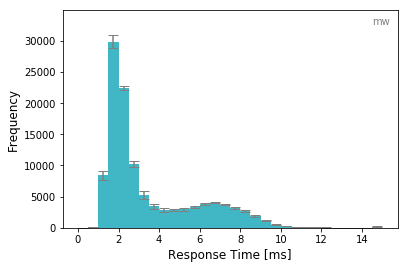

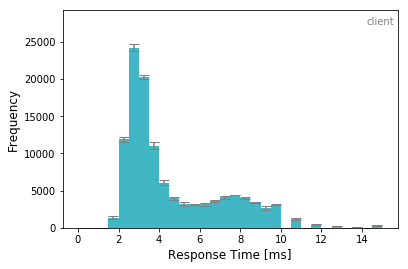

Non-Sharded:


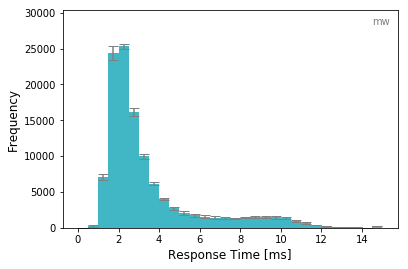

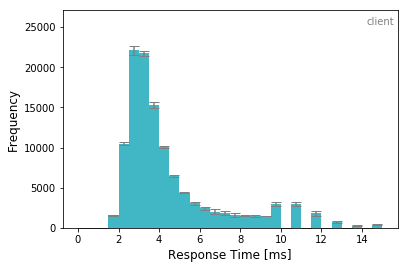

In [14]:
mget_size = 6
bin_size = 0.5
bin_max = 15.0

# TODO [nku] allow setting bin size and y_lim from here
# TODO [nku] display different # of ops due to rounding
# TODO [nku] outlier handling
# TODO [nku] see what Freedman–Diaconis rule: binsize = 2 * IQR(x) * n^(-1/3) would choose for a bin size

exp_name = "exp51"
df_rep_exp51_mw = q_rthist_mw.load_df_by_rep(suite=suite[exp_name], exp=exp_name)
df_rep_exp51_client = q_rthist_client.load_df_by_rep(suite=suite[exp_name], exp=exp_name)

exp_name = "exp52"
df_rep_exp52_mw = q_rthist_mw.load_df_by_rep(suite=suite[exp_name], exp=exp_name)
df_rep_exp52_client = q_rthist_client.load_df_by_rep(suite=suite[exp_name], exp=exp_name)


df_rep_exp51_mw = df_rep_exp51_mw[(df_rep_exp51_mw['multi_get_size']==mget_size)&(df_rep_exp51_mw['op_type']=="get")&(df_rep_exp51_mw['n_worker_per_mw']==throughput_max_n_worker)]
df_rep_exp51_client = df_rep_exp51_client[(df_rep_exp51_client['multi_get_size']==mget_size)&(df_rep_exp51_client['op_type']=="get")&(df_rep_exp51_client['n_worker_per_mw']==throughput_max_n_worker)]

df_rep_exp52_mw = df_rep_exp52_mw[(df_rep_exp52_mw['multi_get_size']==mget_size)&(df_rep_exp52_mw['op_type']=="get")&(df_rep_exp52_mw['n_worker_per_mw']==throughput_max_n_worker)]
df_rep_exp52_client = df_rep_exp52_client[(df_rep_exp52_client['multi_get_size']==mget_size)&(df_rep_exp52_client['op_type']=="get")&(df_rep_exp52_client['n_worker_per_mw']==throughput_max_n_worker)]



df_hist_exp51_mw = hist_stats.aggregate_hist(df_rep_exp51_mw, bin_size=bin_size, bin_max=bin_max)
df_hist_exp51_client = hist_stats.aggregate_hist(df_rep_exp51_client, bin_size=bin_size, bin_max=bin_max)
df_hist_exp52_mw = hist_stats.aggregate_hist(df_rep_exp52_mw, bin_size=bin_size, bin_max=bin_max)
df_hist_exp52_client = hist_stats.aggregate_hist(df_rep_exp52_client, bin_size=bin_size, bin_max=bin_max)

print("Sharded:")
generate(rt.mget_hist, df_hist_exp51_mw, suite[exp_name], f"exp51_sharded_mget6_hist_mw")
generate(rt.mget_hist, df_hist_exp51_client, suite[exp_name], f"exp51_sharded_mget6_hist_client")

print("Non-Sharded:")
generate(rt.mget_hist, df_hist_exp52_mw, suite[exp_name], f"exp52_nonsharded_mget6_hist_mw")
generate(rt.mget_hist, df_hist_exp52_client, suite[exp_name], f"exp52_nonsharded_mget6_hist_client")


### 5.4 Summary